# protostars
## 22- `star_proto_varA_K_delV.py` experiment 12
### I. Experiment with variable exponent of reddening, and rebranding of delR -> delV

`Starfish` with the `star_proto_varA_K_delV.py` code

Na I and CO subset, 20000 steps!!

Technically we ran run01 **after** run02.  Weird, I know.

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp12/output/bb_absolute/run01/emcee_chain.npy")

```bash
gully at gigayear in ~/GitHub/protostars/sf/exp12/output/bb_absolute/run01 on master [!?]
$ /Users/gully/GitHub/protostars/code/star_proto_varA_K_delV.py --samples=20000 --incremental_save=100 --resume
keeping grid as is
Using the user defined prior in $protostars/sf/exp12/output/bb_absolute/run01/user_prior.py
2017 May 18,11:48 PM: 99/20000 = 0.5%
2017 May 18,11:50 PM: 199/20000 = 1.0%
2017 May 18,11:51 PM: 299/20000 = 1.5%
[...]
2017 May 19, 7:11 AM: 19799/20000 = 99.0%
2017 May 19, 7:14 AM: 19899/20000 = 99.5%
2017 May 19, 7:17 AM: 19999/20000 = 100.0%
Traceback (most recent call last):
  File "/Users/gully/GitHub/protostars/code/star_proto_varA_K_delV.py", line 294, in <module>
    np.save('raw_models.npy',sampler.blobs)
  File "//anaconda/envs/Starfish/lib/python3.5/site-packages/numpy/lib/npyio.py", line 491, in save
    pickle_kwargs=pickle_kwargs)
  File "//anaconda/envs/Starfish/lib/python3.5/site-packages/numpy/lib/format.py", line 584, in write_array
    array.tofile(fp)
OSError: 1574400000 requested and 1222123508 written
```

I ran out of disk space!

In [3]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
ws.shape

(40, 20000, 16)

In [5]:
from matplotlib.ticker import MaxNLocator

In [6]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$\delta R$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$A_K$", r"$\alpha$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

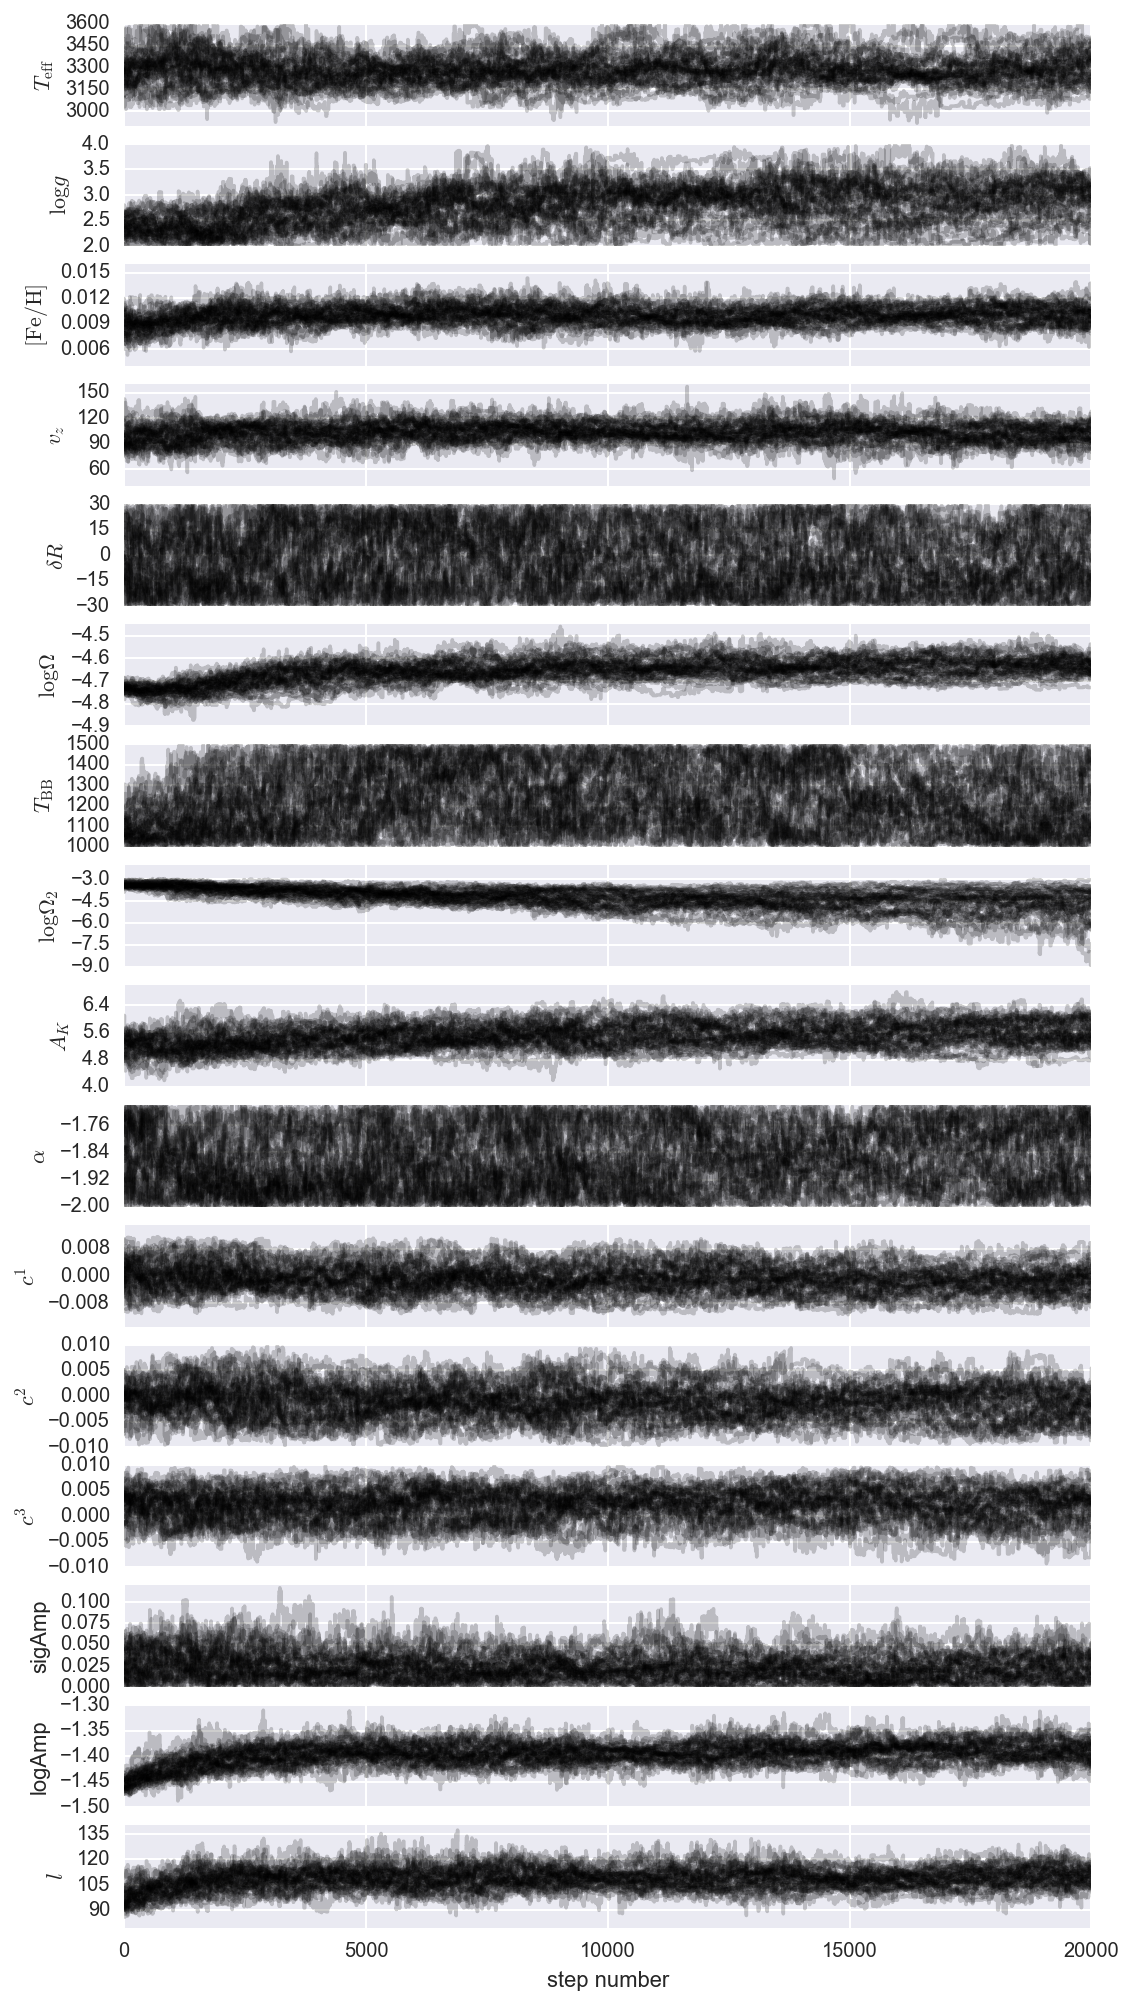

In [7]:
fig, axes = plt.subplots(16, 1, sharex=True, figsize=(8, 14))
for i in range(0, 16, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[15].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

Looks good!

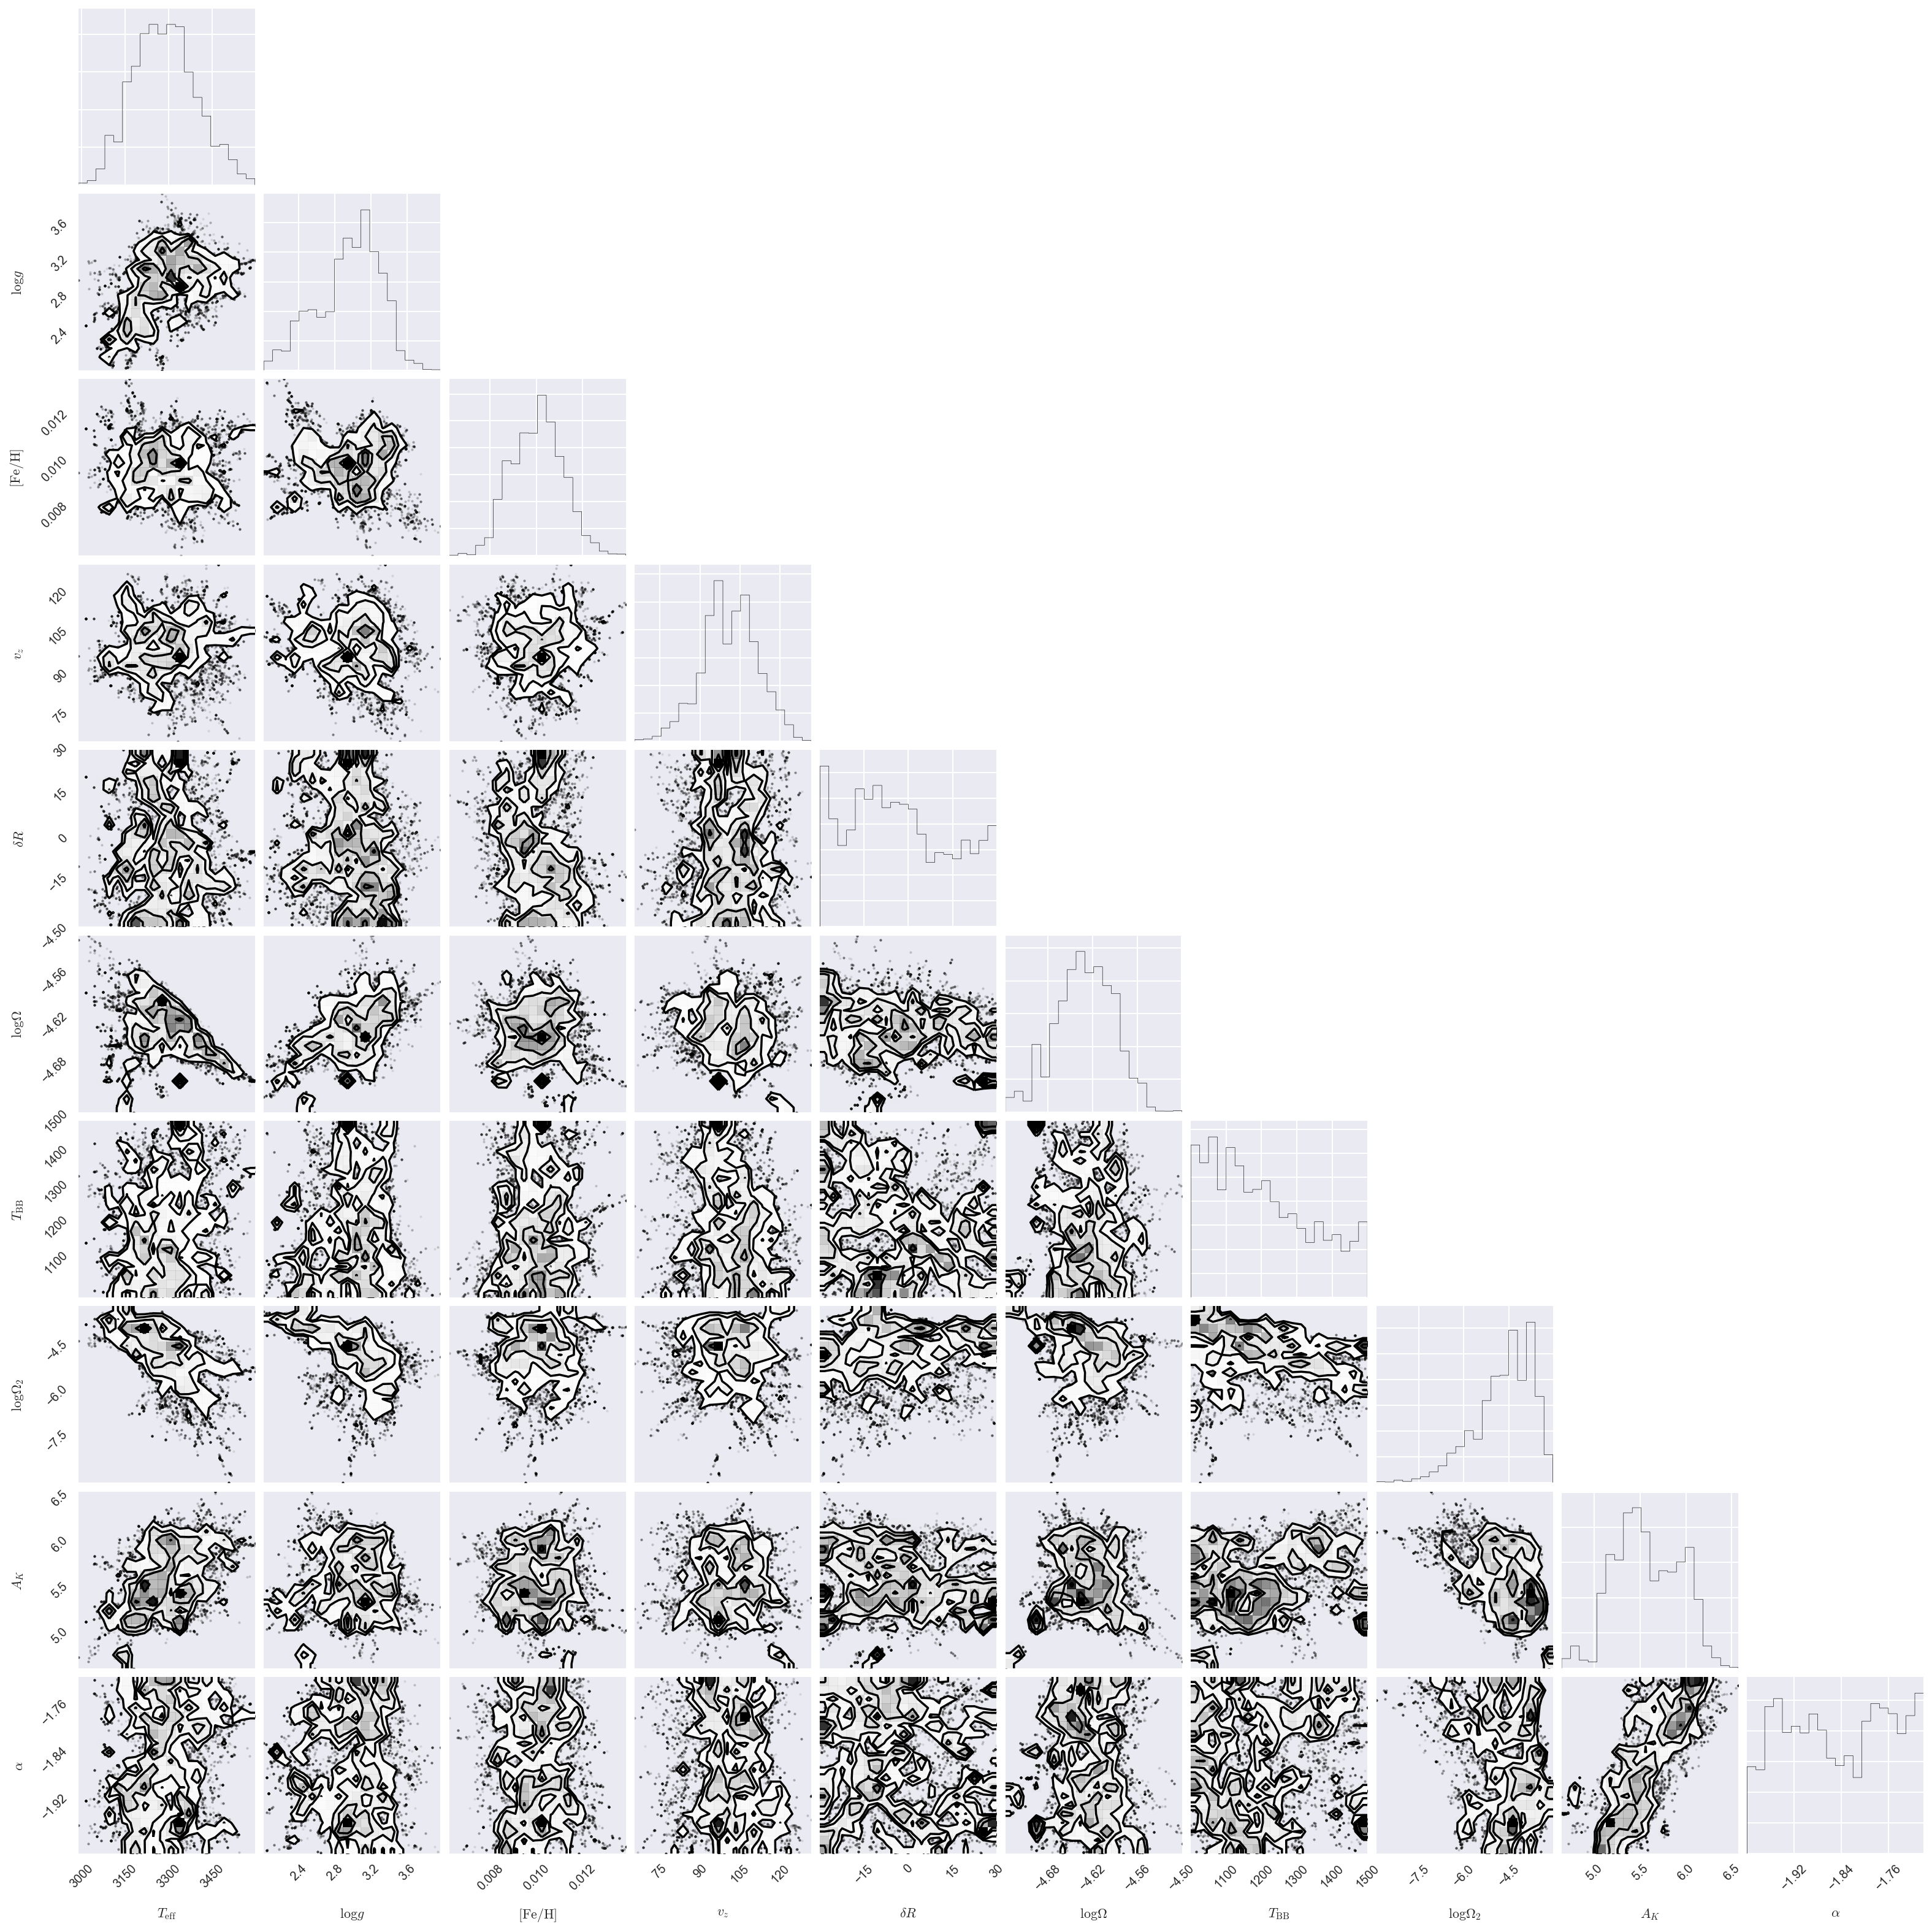

In [8]:
import corner
fig = corner.corner(fc[:, 0:10], labels=label[0:10])
fig.savefig('../plots/exp12_run01_corner.png', dpi=300)

In [9]:
import h5py

f = h5py.File("../data/reduced/S68N_NIRSPEC_CO_NaI.hdf5", "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])

f.close()

In [10]:
raw_mods = np.load('../sf/exp12/output/bb_absolute/run01/temp_raw_models.npy')

In [11]:
fc.shape

(40000, 16)

In [12]:
om_rat = 10**fc[:, 7]/(10**fc[:, 5])

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


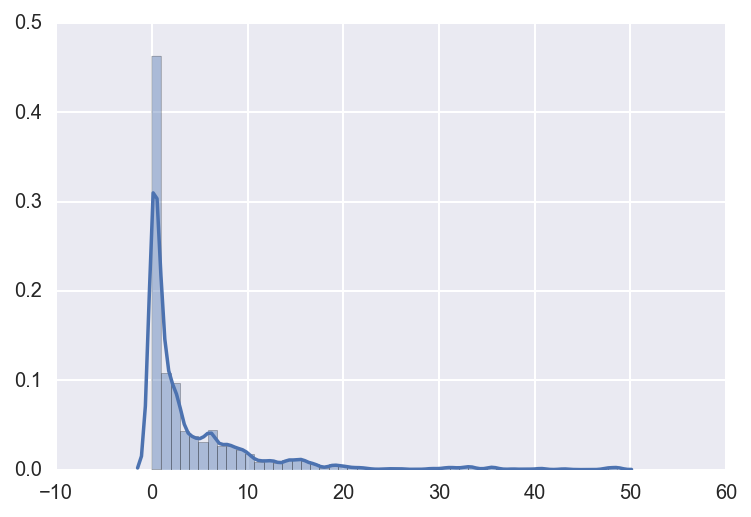

In [13]:
sns.distplot(om_rat)

In [14]:
len(wl)

492

In [15]:
r_lam_all = np.zeros((1000, 40, ))

for j in range(19000, 20000, 1):
    for i in range(0, 40, 1):
        r_lam_all[j-19000, i] = np.median(raw_mods[j][i][1, :]/raw_mods[j][i][0, :])

In [16]:
r_lam_out = r_lam_all.reshape((40000))

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


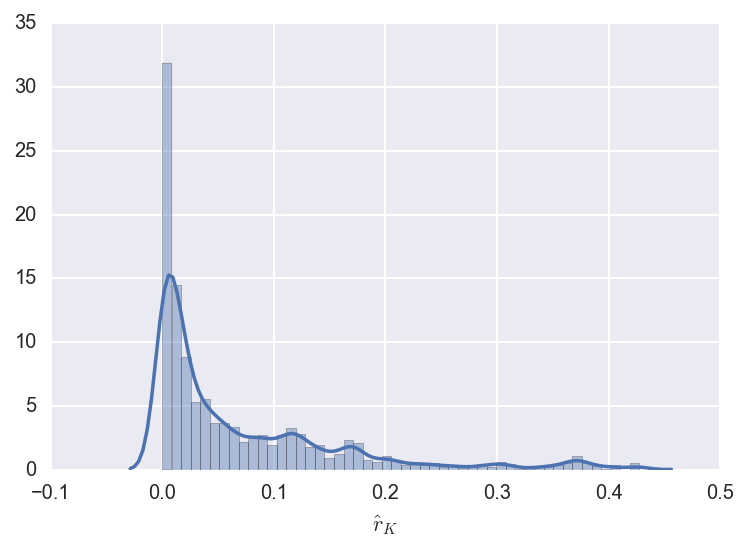

In [17]:
sns.distplot(r_lam_out)
plt.xlabel(r'$\hat r_K$')

In [18]:
star, disk, extinc, cheb = (raw_mods[19999][28][i, :] for i in range(4))

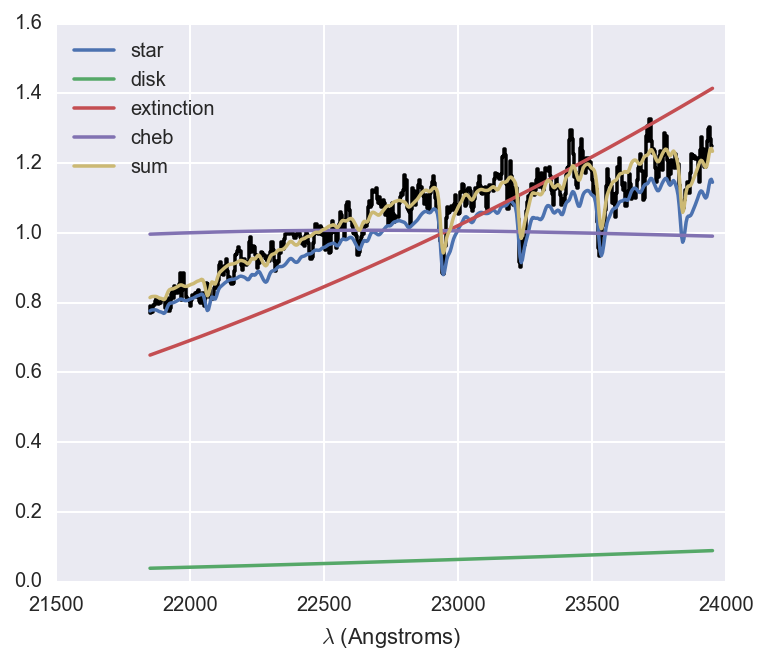

In [19]:
plt.figure(figsize=(6, 5))
plt.step(wl, fl, 'k')
plt.plot(wl, star, label = 'star')
plt.plot(wl, disk, label = 'disk')
plt.plot(wl, extinc, label = 'extinction')
plt.plot(wl, cheb, label = 'cheb')
plt.plot(wl, star+disk, label = 'sum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.legend(loc='best')

Looks good!